# Project 2 - ML
### Run - Random Forests

In [2]:
from random_forest import RF
import pandas as pd
import numpy as np
from helpers import clean_data, confusion_matrix_M, test_accuracy_f1_scores

### Import the data

In [3]:
file = 'data/All_Relative_Results_Cleaned.parquet'
data = pd.read_parquet(file)

### Clean the data

This function tests the number of NaN values, encode the y with the help of an encoder.




Returns a dataframe X, a label y naming the exercises and a label y encoded. 

In [4]:
X, y, y_encoded = clean_data(data)

The initial data contains 27187 of NaN values
There is 27187 rows with 100 percents of NaN positional values.
Hence all rows can be removed from our data set.
Label y extracted!
Label y encoded!
Matrix X created!


#### We implement cross validation to find the following parameters we could use for our Random Forest 

By changing the parameter cross_validation to *True*, we chose to do the cross validation and find the best parameters

In [8]:
# Running this cell to get the needed parameters of running the next cell which would last about 60mins.
best_params = {'n_estimators': 100}

In [4]:
# Running this cell, will give you the best params, in order to avoid running it, you can use the parameters previously initialized
y_test_pos_cv, y_test_pos_cv = RF(X,y, Method = 'M1', cross_validation = True, cv=5, random_state=42)

Method 1
Separation has been done!
Cross Validation chosen
Classifier Defined
Grid search begins
Grid search done
Fit Grid search started


### Now we shall train and evaluate our neural networks, according to the parameters that we have found for each method :

- Method 1 (M1) : Remove the time column and do a 50% split of test and train
- Method 2 (M2): Train on 13 participants and test on 12 participants, keeping the time variable
- Method 3 (M3): Train on 50% train/test split based on unique values of the '*Camera*' column
- Method 4 (M4): Train on 50% train/test split based on unique values of the '*Set*' column

##### ➡️ Replace the paramater Method by 'Mi' for i = 1,2,3,4
*The cross_validation parameter is set to False, as we already have our best parameters*

In [5]:
y_true_pos, y_pred_pos = RF(X,y, Method = 'M1', cross_validation = False, cv=5, random_state=42)
y_true_time, y_pred_time = RF(X,y, Method = 'M2', cross_validation = False, cv=5, random_state=42)
y_true_camera, y_pred_camera = RF(X,y, Method = 'M3', cross_validation = False, cv=5, random_state=42)
y_true_error, y_pred_error = RF(X,y, Method = 'M4', cross_validation = False, cv=5, random_state=42)

Method 1
Separation has been done!
Method 2
Separation has been done!
Method 3
Separation has been done!
Method 4
Separation has been done!


#### Now we can test the accuracy and the f1 score of each one of these methods, with the help of an auxiliary function :

In [6]:
test_accuracy_f1_scores(y_true_pos, y_pred_pos, 'M1', 'Random Forests')
print("\n")
test_accuracy_f1_scores(y_true_time, y_pred_time, 'M2', 'Random Forests')
print("\n")
test_accuracy_f1_scores(y_true_camera, y_pred_camera, 'M3', 'Random Forests')
print("\n")
test_accuracy_f1_scores(y_true_error, y_pred_error, 'M4', 'Random Forests')
print("\n")
print(f"Overall accuracy : {(np.mean(y_true_pos == y_pred_pos)+np.mean(y_true_time == y_pred_time)+np.mean(y_true_camera == y_pred_camera)+np.mean(y_true_error == y_pred_error))/4*100} %")

Test Accuracy for method M1 and model Random Forests: 99.26%
F1 Score macro for method M1 and model Random Forests: 0.9930
F1 Score micro for method M1 and model Random Forests: 0.9926


Test Accuracy for method M2 and model Random Forests: 93.47%
F1 Score macro for method M2 and model Random Forests: 0.9377
F1 Score micro for method M2 and model Random Forests: 0.9347


Test Accuracy for method M3 and model Random Forests: 99.47%
F1 Score macro for method M3 and model Random Forests: 0.9951
F1 Score micro for method M3 and model Random Forests: 0.9947


Test Accuracy for method M4 and model Random Forests: 99.46%
F1 Score macro for method M4 and model Random Forests: 0.9950
F1 Score micro for method M4 and model Random Forests: 0.9946


Overall accuracy : 97.91789729045688 %


### Plot normalized confusion matrix for each method, in different colors

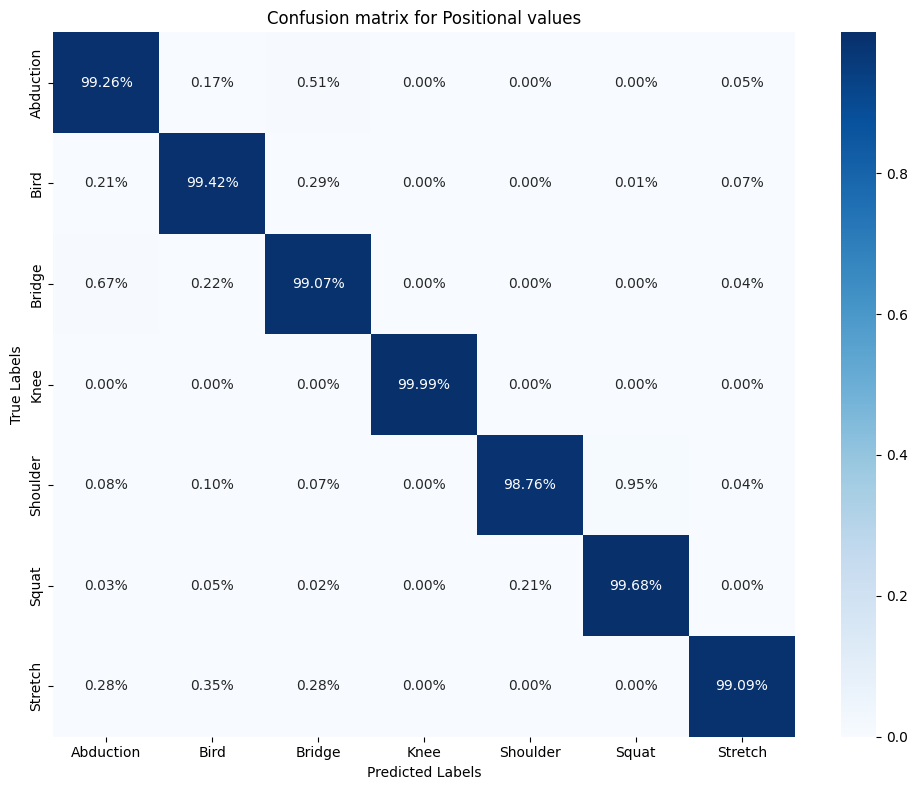

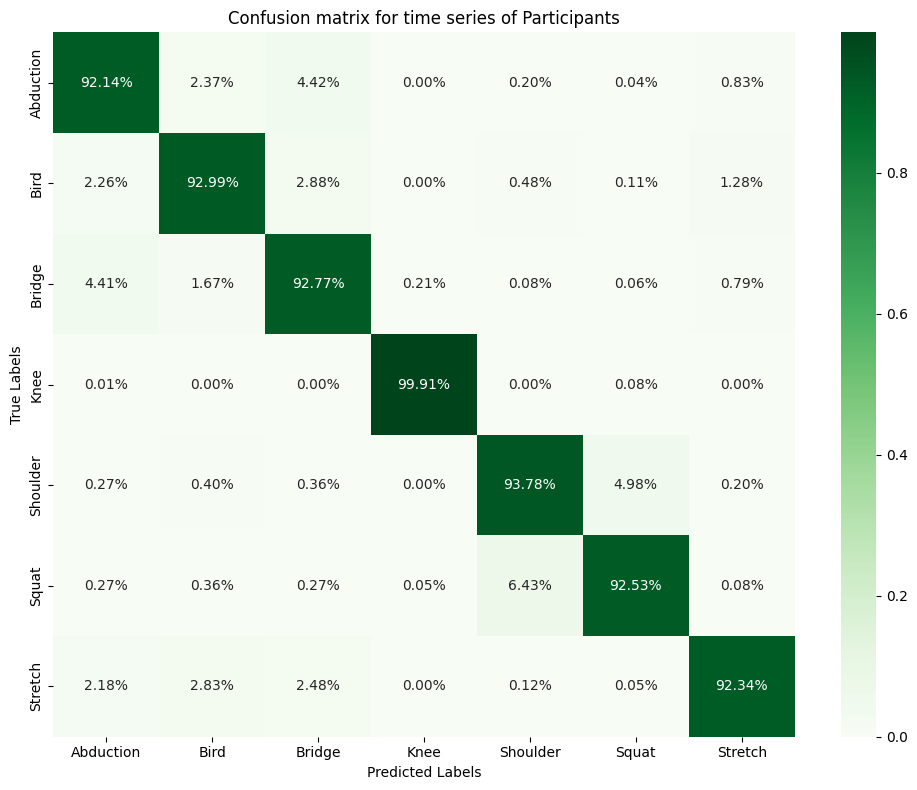

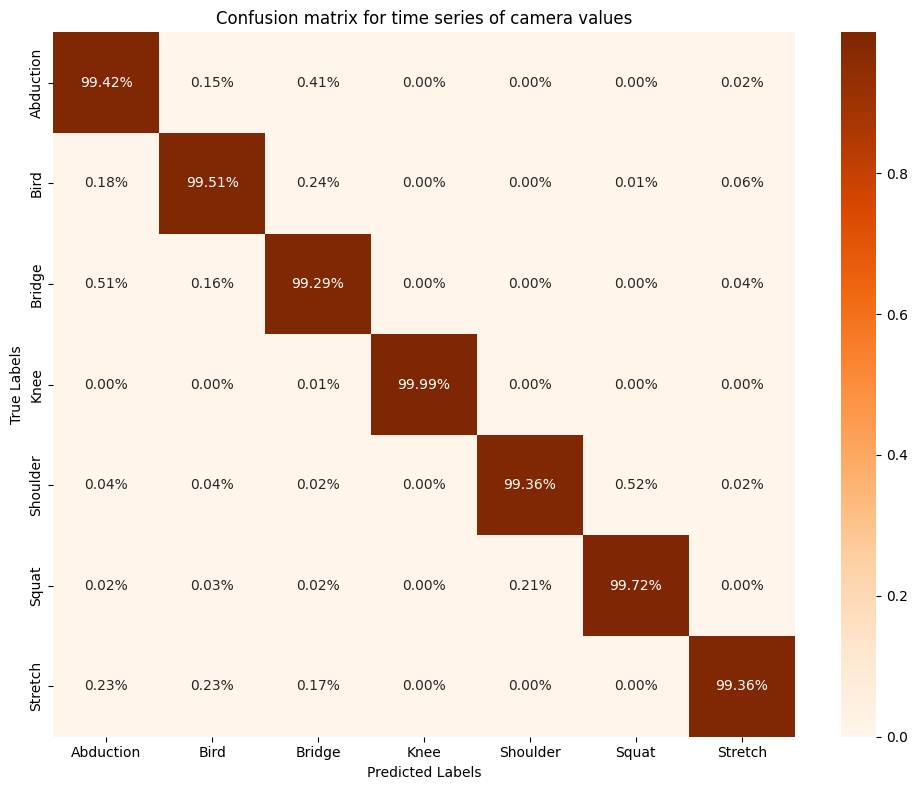

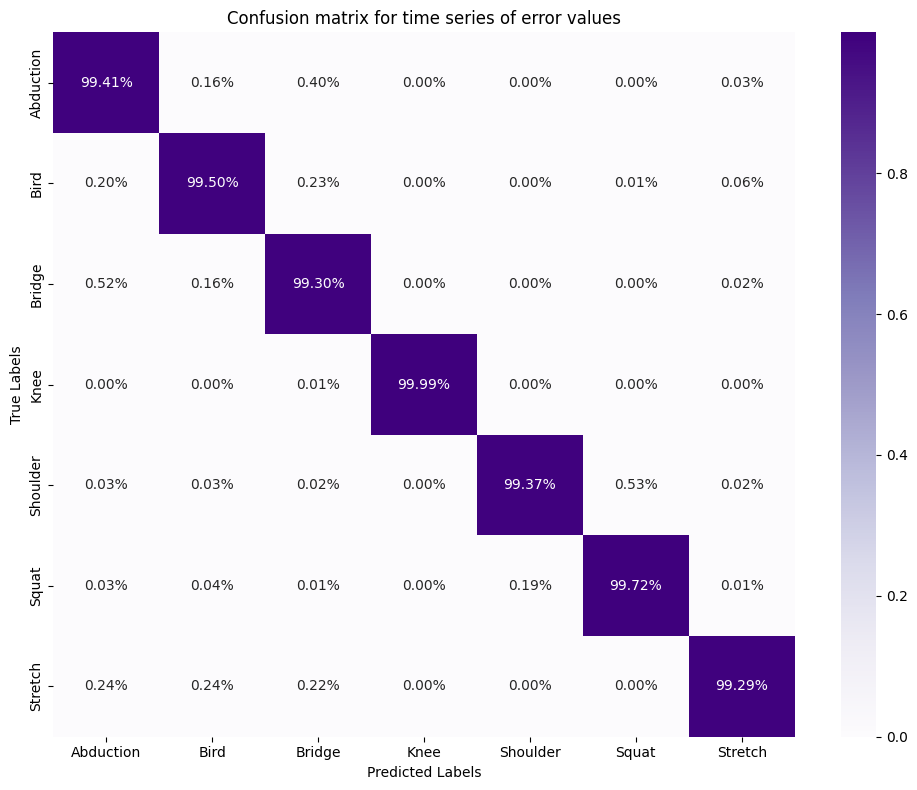

In [7]:
confusion_matrix_M(y, y_true_pos, y_pred_pos, y_true_time, y_pred_time, y_true_camera, y_pred_camera, y_true_error, y_pred_error)